## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

# Display the data table for preview


In [2]:
# Checking the number of mice.
mice = mouse_metadata.drop_duplicates(subset=['Mouse ID'])
print(mice['Mouse ID'].count())
mice.head()

249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results_df =study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep =False)



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_study_results_df =study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])==True].sort_values('Mouse ID')
duplicated_study_results_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_df= pd.merge(study_results_df, mice, on="Mouse ID" ,how="left")
study_results_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1878,r944,45,41.581521,2,Capomulin,Male,12,25
1879,u364,45,31.023923,3,Capomulin,Male,18,17
1880,p438,45,61.433892,1,Ceftamin,Female,11,26
1881,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.

print(len(pd.unique(study_results_df['Mouse ID'])))
                 

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_df =study_results_df[['Drug Regimen','Tumor Volume (mm3)']]

mean_df = tumor_df.groupby('Drug Regimen', as_index=False).mean().rename(columns={'Tumor Volume (mm3)':'mean'}, inplace=False)
median_df = tumor_df.groupby('Drug Regimen', as_index=False).median().rename(columns={'Tumor Volume (mm3)':'median'}, inplace=False)
var_df = tumor_df.groupby('Drug Regimen', as_index=False).var().rename(columns={'Tumor Volume (mm3)':'var'}, inplace=False)
std_df = tumor_df.groupby('Drug Regimen', as_index=False).std().rename(columns={'Tumor Volume (mm3)':'std'}, inplace=False)
sem_df = tumor_df.groupby('Drug Regimen', as_index=False).sem().rename(columns={'Tumor Volume (mm3)':'sem'}, inplace=False)
mean_df


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

result = pd.concat([mean_df, median_df['median'], var_df['var'], std_df['std'], sem_df['sem']], axis=1)
print(result.to_string(index=False))




Drug Regimen       mean     median        var       std       sem
   Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
    Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
   Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
    Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
    Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
     Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
    Propriva  52.458254  50.854632  44.053659  6.637293  0.540135
    Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
    Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
   Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_df= tumor_df.groupby('Drug Regimen', as_index=True).agg(['mean','median','var','std','sem']) #.rename(columns={'Tumor Volume (mm3)':'mean','Tumor Volume (mm3)': 'Median', 'Tumor Volume (mm3)': 'std'} inplace=False)

agg_df




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
agg_df_1= tumor_df.agg(['mean','median','var','std','sem']).transpose()

print(agg_df)
print(f'  {agg_df_1.to_string(header=False)}')


             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398
  Tumor Volume (mm3)  50.44931  48.951

## Bar and Pie Charts

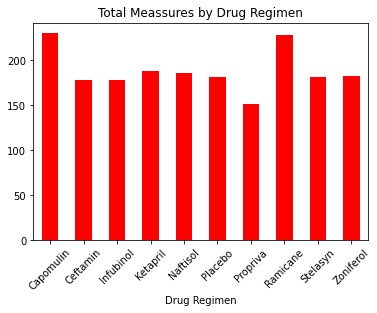

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_df = tumor_df.groupby('Drug Regimen', as_index=False).count().rename(columns={'Tumor Volume (mm3)':'count'}, inplace=False)



ax = count_df.plot.bar(x='Drug Regimen', y='count', rot=45, color='red', title = 'Total Meassures by Drug Regimen', legend = False)
                      #ylabel= Total Meassures')


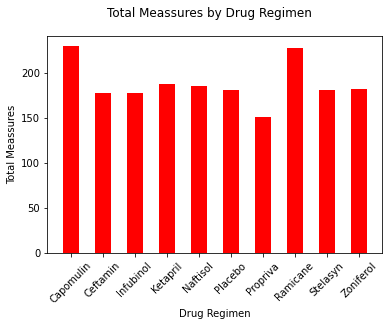

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

Drug_reg = count_df['Drug Regimen']
count_y = count_df['count']


#x_axis = np.arange(len(Drug_reg))
#tick_loc = [value for value in x_axis]
#plt.xticks(tick_loc,Drug_reg)

plt.bar(Drug_reg,count_y, width=0.5, align = 'center', data=None, color ='red')
plt.xticks(rotation = 45) 
plt.xlabel('Drug Regimen')  
plt.ylabel('Total Meassures') 
plt.suptitle('Total Meassures by Drug Regimen')
plt.show()

<AxesSubplot:title={'center':'Distribution by Gender'}, ylabel='Mouse ID'>

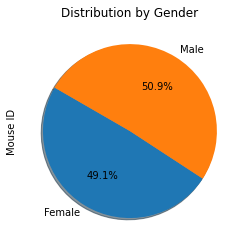

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


#gender_df = study_results_df[['Mouse ID','Sex']]
by_gender_df= study_results_df[['Mouse ID','Sex']].groupby('Sex', as_index=False).count() #.rename(columns={'Sex':'Gender', 'Mouse ID':'Count'}, inplace=False)

labels = by_gender_df['Sex']

plot = by_gender_df.plot.pie(y='Mouse ID', labels = labels, title='Distribution by Gender'
                            , autopct='%1.1f%%', legend = False, startangle=150, shadow=True)

plot

#by_gender_df

([<matplotlib.patches.Wedge at 0x23a469074f0>,
 [Text(-0.7299924150353834, -0.8228675920163637, 'Female'),
  Text(0.7299924150353835, 0.8228675920163636, 'Male')],
 [Text(-0.3981776809283909, -0.44883686837256204, '49.1%'),
  Text(0.39817768092839095, 0.4488368683725619, '50.9%')])

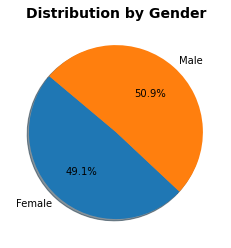

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


by_gender_df


#study_results_df[['Mouse ID','Sex']]
gender = by_gender_df['Sex'] #Label
count_y = by_gender_df['Mouse ID'] #Values
#colors = ["yellow", "orange"]
explode = (0, 0)
plt.title('Distribution by Gender', fontsize=14.0, fontweight='bold') #colors=colors,
plt.pie(count_y, explode=explode, labels = gender,  autopct='%1.1f%%',
        textprops={'color':"k"}, shadow = True, startangle=140)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_time = study_results_df.groupby(['Drug Regimen','Mouse ID'], as_index=False).max(['Timepoint'])

max_time = max_time.loc[(max_time['Drug Regimen'] =='Capomulin') | (max_time['Drug Regimen'] == 'Ramicane') |
                               (max_time['Drug Regimen'] == 'Infubinol') | 
                               (max_time['Drug Regimen'] == 'Ceftamin') ] 

# Start by getting the last (greatest) timepoint for each mouse
max_time.sort_values(by=['Timepoint', 'Drug Regimen'], ascending = False, ignore_index=True, inplace=True )

max_time =  max_time[['Mouse ID','Tumor Volume (mm3)']].rename(columns={'Tumor Volume (mm3)':'Tumor Volume Max'}, inplace=False)

max_time


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_df= pd.merge(study_results_df, max_time, on="Mouse ID" ,how="inner")

max_time_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume Max
0,b128,0,45.000000,0,Capomulin,Female,9,22,45.651331
1,b128,5,45.651331,0,Capomulin,Female,9,22,45.651331
2,b128,10,43.270852,0,Capomulin,Female,9,22,45.651331
3,b128,15,43.784893,0,Capomulin,Female,9,22,45.651331
4,b128,20,42.731552,0,Capomulin,Female,9,22,45.651331
...,...,...,...,...,...,...,...,...,...
809,m601,25,33.118756,1,Capomulin,Male,22,17,45.000000
810,m601,30,31.758275,1,Capomulin,Male,22,17,45.000000
811,m601,35,30.834357,1,Capomulin,Male,22,17,45.000000
812,m601,40,31.378045,1,Capomulin,Male,22,17,45.000000


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatments_list = max_time_df['Drug Regimen'].unique()
treatments_list
#print(treatments_list)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

#tumors = max_time_df['Drug Regimen','Tumor Volume (mm3)']
tumors = max_time_df.loc[max_time_df['Drug Regimen'].isin(list(treatments_list))]

#print(tumors)
tumor_vol =tumors['Tumor Volume (mm3)']
#print(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_volume_df = max_time_df['Tumor Volume (mm3)']
#print(max_time_df['Tumor Volume (mm3)'].describe())

quartiles = tumor_volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

# Determine outliers
outliers_df=  max_time_df.loc[
                            (max_time_df['Tumor Volume (mm3)'] < (lowerq - (1.5*iqr))) |
                            (max_time_df['Tumor Volume (mm3)'] > (upperq + (1.5*iqr)))]  

#print(outliers_df)

# Locate the rows which contain mice on each drug and get the tumor volumes


# add subset 
    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of Tumor Volume is: 40.2201707875
The upper quartile of Tumor Volume is: 50.356470630000004
The interquartile range of Tumor Volume is: 10.136299842500001
The the median of Tumor Volume is: 45.0 
Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.


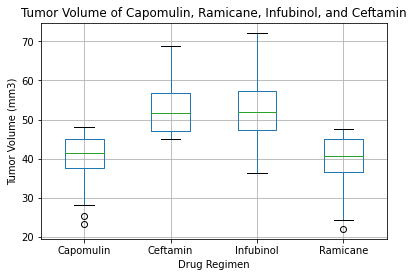

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

max_time_df.boxplot(column ='Tumor Volume (mm3)', by=  'Drug Regimen')
plt.title('Tumor Volume of Capomulin, Ramicane, Infubinol, and Ceftamin')
plt.suptitle('')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

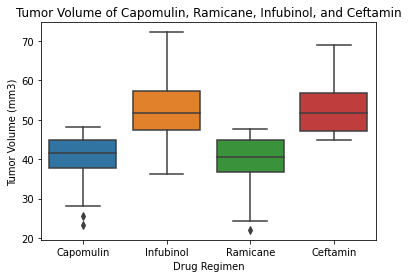

In [17]:
import seaborn as sns
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=  max_time_df)
plt.title('Tumor Volume of Capomulin, Ramicane, Infubinol, and Ceftamin')
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

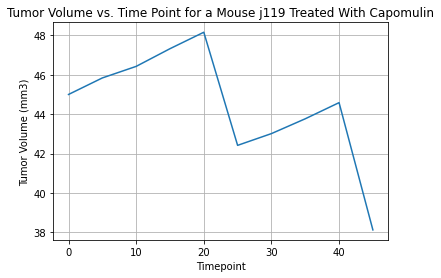

In [18]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_s = tumors[tumors['Mouse ID']== 'j119']
#print(capomulin)

y_tumor = capomulin_s['Tumor Volume (mm3)']
x_time =  capomulin_s['Timepoint']
plt.plot(x_time,y_tumor)

#axis labels
plt.xlabel('Timepoint')  
plt.ylabel('Tumor Volume (mm3)') 
plt.grid()

# displaying the title 
plt.title("Tumor Volume vs. Time Point for a Mouse j119 Treated With Capomulin") 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

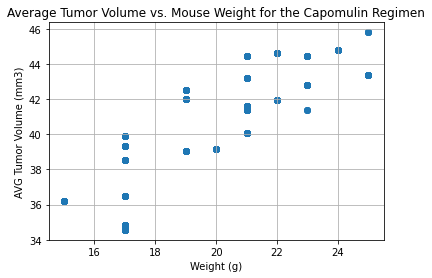

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = study_results_df[(study_results_df['Drug Regimen'] =='Capomulin')]

#Average per mouse
capomulin_mean_bymouse = study_results_df.groupby(['Drug Regimen','Mouse ID'], as_index=False).mean(['Tumor Volume (mm3)'])

capomulin_mean_bymouse_df= pd.merge(capomulin, capomulin_mean_bymouse, on="Mouse ID" ,how="left")
capomulin_mean_bymouse_df[['Mouse ID','Weight (g)_x', 'Tumor Volume (mm3)_y' ]]


#Insert a Column
#capomulin['AVG Tumor Volume (mm3)'] = mean_df.loc[mean_df['Drug Regimen'] =='Capomulin','mean'].values[0]


#Add a Column
#capomulin['AVG Tumor Volume (mm3)'] = avg_camolin

#capomulin Vs AVG General Tumor Volume
#y_avg = capomulin['AVG Tumor Volume (mm3)']
#x_weight =  capomulin['Weight (g)']


#capomulin Vs AVG General per 'Mouse ID'
y_avg = capomulin_mean_bymouse_df['Tumor Volume (mm3)_y']
x_weight =  capomulin_mean_bymouse_df['Weight (g)_x']


plt.scatter(x_weight,y_avg)
plt.grid()


#axis labels
plt.xlabel('Weight (g)')  
plt.ylabel('AVG Tumor Volume (mm3)') 
#plt.ylim([40, 42])

# displaying the title 
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen") 

plt.show


## Correlation and Regression

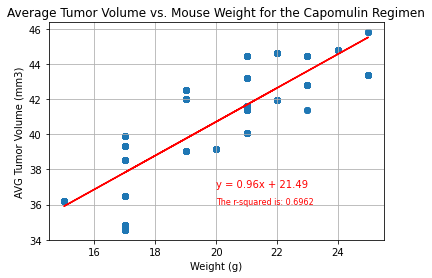

The r-squared is: 0.6962
The correlation between both factors is 0.83


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

y_avg = capomulin_mean_bymouse_df['Tumor Volume (mm3)_y']
x_weight =  capomulin_mean_bymouse_df['Weight (g)_x']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight, y_avg)
regress_values = x_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_weight,y_avg)
plt.plot(x_weight,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=10,color="red")

#Title and axes labels
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen") 
plt.xlabel('Weight (g)')  
plt.ylabel('AVG Tumor Volume (mm3)') 

plt.annotate(f"The r-squared is: {round(rvalue**2,4)}",(20,36),fontsize=8,color="red")

plt.grid()
plt.show()



correlation = st.pearsonr(x_weight,y_avg)
print(f"The r-squared is: {round(rvalue**2,4)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
